In [7]:
import pathlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import progressbar
import scipy.fft

import microburst_ann.config as config
import microburst_ann.misc.load_hilt_data as load_hilt_data

In [46]:
time_limits = ['1999-08-17T04:00:18', '1999-08-17T04:00:20']
hilt = load_hilt_data.Load_SAMPEX_HILT(time_limits[0])
hilt.resolve_counts_state4()
hilt.hilt_resolved = hilt.hilt_resolved.loc[time_limits[0]:time_limits[1], :]

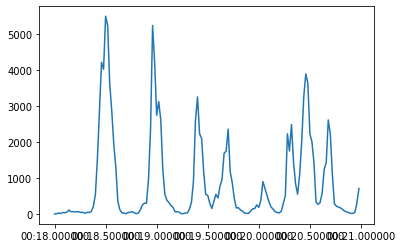

In [47]:
plt.plot(hilt.hilt_resolved.index, hilt.hilt_resolved.counts)
plt.show()

In [48]:
y = hilt.hilt_resolved.counts.to_numpy() - hilt.hilt_resolved.counts.to_numpy().mean()
yf = scipy.fft.rfft(y)
xf = scipy.fft.rfftfreq(hilt.hilt_resolved.shape[0], 0.020)

(0.0, 10.0)

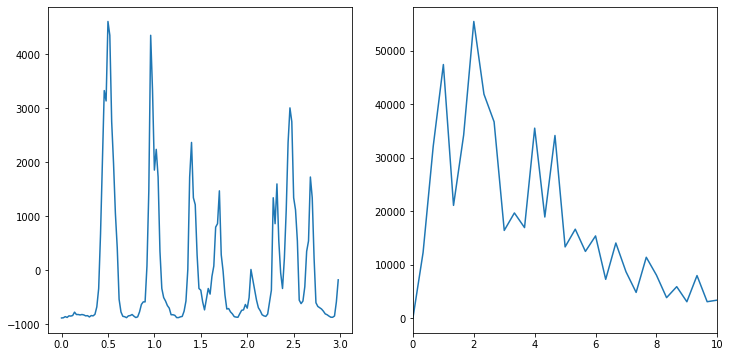

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].plot(np.arange(0, y.shape[0]*20E-3, 20E-3), y)
ax[1].plot(xf, np.abs(yf))
ax[1].set_xlim(0, 10)

In [50]:
xf[np.argmax(yf)]

2.0